<a href="https://colab.research.google.com/github/V1S10US/CBR/blob/main/CBR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:43,4-Нет,3-Малое,База,К
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaN,2018-01-19 09:41,4-Нет,3-Малое,База,К
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216


Содержание - текст обращения пользователя  
Сервис - узел, откуда пришло обращение  
Статус - статус заявки во времени  
Функциональная группа - ?  
Крайний срок - понятно  
Дата обращения - дата обращения  
Тип обращения на момент подачи  
Тип обращения итоговый  
Решение - текст ответа на обращение с результатом работы  
Тип переклассификации -  
0 -- не переклассифицирован,  
1 -- запрос -> инцидент,  
2 -- инцидент -> запрос;  
Дата восстановления - дата разрешения проблемы у пользователя  
Дата закрытия обращения - дата окончания рассмотрения обращения **после** восстановления  
Критичность - ?  
Влияние - ?  
Место - ?



In [54]:
test = pd.read_csv('test.csv')
test.head()

,id,Содержание,Сервис,Приоритет,Статус,Функциональная группа,Крайний срок,Дата обращения,Тип обращения на момент подачи,Тип обращения итоговый,Решение,Тип переклассификации,Дата восстановления,Дата закрытия обращения,Критичность,Влияние,Система,Место
0,14803,Заявка на предоставление и отзыв прав доступа ...,Сервис41,3-Низкий,Закрыт,ФГ13,2018-02-22 07:51,2018-02-16 13:11,Запрос,NaN,Работы по обращению выполнены,NaN,2018-02-18 04:32,2018-02-25 07:56,4-Нет,4-Нет влияния,Система43,Место38
1,14804,Транспортный шлюз,Сервис61,2-Средний,Закрыт,ФГ1,2018-02-21 14:36,2018-02-16 13:13,Запрос,NaN,проинф у.о.,NaN,2018-02-16 17:55,2018-02-24 07:54,1-Особая,3-Малое,Система61,К
2,14805,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-31 06:36,2018-02-16 13:13,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25
3,14806,Заявка на предоставление и отзыв прав доступа ...,Сервис91,3-Низкий,Отменен,ФГ13,2018-02-21 14:29,2018-02-16 13:14,Запрос,NaN,Запрос отменён пользователем из портала самооб...,NaN,2018-02-16 13:15,NaN,2-Повышенная,4-Нет влияния,Система363,Место1
4,14807,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-03-30 09:36,2018-02-16 13:14,Запрос,NaN,Работы по обращению выполнены,NaN,2018-03-15 16:09,2018-03-23 07:56,2-Повышенная,4-Нет влияния,Система13,Место25


In [240]:
train.dropna()

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,1.0
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55,2018-01-26 00:00,4-Нет,3-Малое,База,Место177,1.0
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216,1.0
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216,1.0
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02,2018-02-23 14:18,1-Особая,3-Малое,Система7,Место50,1.0
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07,Запрос,Запрос,Выполнено,0,2018-02-21 12:03,2018-03-07 13:22,4-Нет,3-Малое,База,Место3,1.0
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01,2018-03-07 08:46,4-Нет,4-Нет влияния,Система2,Место163,1.0
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09,Запрос,Запрос,выполнено,0,2018-02-17 10:01,2018-02-24 11:22,4-Нет,4-Нет влияния,Система71,Место3,1.0


In [235]:
train.iloc[2, 9]

'Выполнена разблокировка у/з Ne_bosS\\*********\nИдентификация пользователя осуществлена.\nОбъект доступа легален.\nПричина нарушения: Несколько раз неправильный ввод пароля'

In [259]:
train.groupby('criticality').agg('count').description

criticality
1-Особая        4717
2-Повышенная    2369
3-Базовая        941
4-Нет           6775
Name: description, dtype: int64

In [77]:
new_cols = {'Содержание': 'description', 'Сервис': 'service', 'Приоритет': 'priority',
            'Статус':'status', 'Функциональная группа': 'func_group',
       'Крайний срок' : 'deadline', 'Дата обращения' : 'request_date', 'Тип обращения на момент подачи' : 'request_type_first',
       'Тип обращения итоговый' : 'request_type_final', 'Решение             ' : 'decision',
       'Тип переклассификации' : 'requal_type', 'Дата восстановления' : 'recovery_date',
       'Дата закрытия обращения' : 'close_request_date', 'Критичность' : 'criticality', 'Влияние':'effect', 'Система': 'system',
       'Место' : 'place'}

train = train.rename(columns=new_cols)


Тип переквалификации:  
0 - нет переквалификации  
1 - Запрос-> Инцидент  
2 - Инцидент-> Запрос  


In [247]:
train['status'].groupby(train.status).count()

status
Закрыт     14369
Отменен      434
Name: status, dtype: int64

Распределение критичности обращений

In [253]:
train.criticality.value_counts(normalize=True)

4-Нет           0.457677
1-Особая        0.318652
2-Повышенная    0.160103
3-Базовая       0.063568
Name: criticality, dtype: float64

In [254]:
train.effect.value_counts(normalize=True)

4-Нет влияния        0.616294
3-Малое              0.379315
2-Значительное       0.004053
1-Всеохватывающее    0.000338
Name: effect, dtype: float64

In [255]:
train.priority.value_counts(normalize=True)

3-Низкий         0.681889
2-Средний        0.317098
1-Высокий        0.000811
0-Критический    0.000203
Name: priority, dtype: float64

In [207]:
train.service.value_counts()

АРМ          3434
Сервис7      1746
Сервис22     1567
Сервис13      838
Сервис2       808
             ... 
Сервис208       1
Сервис390       1
Сервис201       1
Сервис336       1
Сервис193       1
Name: service, Length: 153, dtype: int64

In [213]:
train[train.service == 'Сервис336']

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent
8060,RE: Актуализация матрицы доступа на ресурсе Де...,Сервис336,3-Низкий,Закрыт,ФГ19,2018-02-11 15:36,2018-02-04 18:20,Запрос,Запрос,Выполнена Актуализация матрицы доступа на ресу...,0,2018-02-09 00:00,2018-02-16 07:55,4-Нет,2-Значительное,Система23,Место225,1.0


In [ ]:
train

In [129]:
train_cr = (train.priority.value_counts() / len(train))[::-1]
train_cr

0-Критический    0.000203
1-Высокий        0.000811
2-Средний        0.317098
3-Низкий         0.681889
Name: priority, dtype: float64

In [261]:
train.groupby(train.system).agg('count').description

system
База          3508
Система1         3
Система10        2
Система100      11
Система101     452
              ... 
Система92       43
Система94       43
Система95        3
Система97       35
Система99       20
Name: description, Length: 201, dtype: int64

In [150]:
t = pd.to_datetime(train.close_request_date)


pandas.core.series.Series

In [262]:
train[train.recovery_date > train.close_request_date]

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent


аномалия: время восстановления меньше времени закрытия заявки  
почистить дубликаты

In [179]:
rec = 1790
print(f'description: {train.iloc[rec, 0]}\n decision: {train.iloc[rec, 9]}')
train.iloc[rec]

description: Заявка на предоставление доступа работникамДепартаментКоторыйОтвечает (но это не точно)
 decision: Работы по обращению выполнены.


description            Заявка на предоставление доступа работникамДеп...
service                                                              АРМ
priority                                                        3-Низкий
status                                                            Закрыт
func_group                                                          ФГ12
deadline                                                2018-02-02 07:51
request_date                                            2018-01-27 15:52
request_type_first                                                Запрос
request_type_final                                                Запрос
decision                                  Работы по обращению выполнены.
requal_type                                                            0
recovery_date                                           2018-01-28 15:09
close_request_date                                      2018-02-07 07:56
criticality                                        

In [181]:
train[train.description == 'Заявка на предоставление доступа работникамДепартаментКоторыйОтвечает (но это не точно)'].count()

description            115
service                115
priority               115
status                 115
func_group             115
deadline               115
request_date           115
request_type_first     115
request_type_final     115
decision               115
requal_type            115
recovery_date          115
close_request_date     115
criticality            115
effect                 115
system                 115
place                  115
criticality_percent    115
dtype: int64

In [271]:
train['recovery_date'] = pd.to_datetime(train.recovery_date)
train['request_date'] = pd.to_datetime(train.request_date)
train['close_request_date'] = pd.to_datetime(train.close_request_date)

train.tail()

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent,hour
14798,разблокировка учетной записи пользователя вСе...,Сервис7,2-Средний,Закрыт,ФГ8,2018-02-21 14:17,2018-02-16 13:02:00,Запрос,Запрос,Личность пользователя идентифицирована\nПричи...,0,2018-02-16 13:02:00,2018-02-23 14:18:00,1-Особая,3-Малое,Система7,Место50,1.0,13.0
14799,Устранение уязвимостей ИБ в соответствии с Пла...,АРМ,3-Низкий,Закрыт,ФГ135,2018-02-21 14:36,2018-02-16 13:07:00,Запрос,Запрос,Выполнено,0,2018-02-21 12:03:00,2018-03-07 13:22:00,4-Нет,3-Малое,База,Место3,1.0,12.0
14800,Контроль ПУ. Заявка на доступ к портам.,Сервис2,3-Низкий,Закрыт,ФГ315,2018-02-21 14:23,2018-02-16 13:08:00,Запрос,Запрос,Работы выполнены согласно заявке.,0,2018-02-21 07:01:00,2018-03-07 08:46:00,4-Нет,4-Нет влияния,Система2,Место163,1.0,7.0
14801,Ремонт стульев.,Сервис73,3-Низкий,Закрыт,ФГ159,2018-02-21 14:24,2018-02-16 13:09:00,Запрос,Запрос,выполнено,0,2018-02-17 10:01:00,2018-02-24 11:22:00,4-Нет,4-Нет влияния,Система71,Место3,1.0,10.0
14802,Заявка на предоставление и отзыв прав доступа ...,Сервис22,3-Низкий,Закрыт,ФГ13,2018-02-18 13:10,2018-02-16 13:10:00,Запрос,Запрос,Работы по обращению выполнены,0,2018-02-17 08:18:00,2018-02-23 12:29:00,2-Повышенная,4-Нет влияния,Система101,Место27,1.0,8.0


In [267]:
train['hour'] = train.recovery_date.dt.hour
train.head(10)

,description,service,priority,status,func_group,deadline,request_date,request_type_first,request_type_final,decision,requal_type,recovery_date,close_request_date,criticality,effect,system,place,criticality_percent,hour
0,Тест,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 07:42,2018-01-19 09:27,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:43,4-Нет,3-Малое,База,К,1.0,NaN
1,Тестовое обращение,АРМ,3-Низкий,Отменен,ФГ1,2018-01-24 10:51,2018-01-19 09:36,Запрос,Запрос,Тест,0,NaT,2018-01-19 09:41,4-Нет,3-Малое,База,К,1.0,NaN
2,Выполнена разблокировка у/з REGION\*****,Сервис7,2-Средний,Закрыт,ФГ8,2018-01-31 07:51,2018-01-25 22:47,Запрос,Запрос,Выполнена разблокировка у/з Ne_bosS\*********\...,0,2018-01-25 22:47:00,2018-02-02 07:52,1-Особая,3-Малое,Система7,Место190,1.0,22.0
3,.Не включается ПК,АРМ,3-Низкий,Закрыт,ФГ390,2018-01-28 05:50,2018-01-25 23:13,Инцидент,Инцидент,Выход из стоя БП. Заменён.,0,2018-01-25 23:55:00,2018-01-26 00:00,4-Нет,3-Малое,База,Место177,1.0,23.0
4,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-03 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-28 02:54:00,2018-02-04 07:53,4-Нет,4-Нет влияния,База,Место216,1.0,2.0
5,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:19:00,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216,1.0,3.0
6,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:11:00,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216,1.0,3.0
7,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 03:15:00,2018-02-02 07:52,4-Нет,4-Нет влияния,База,Место216,1.0,3.0
8,"Заявка № ***********, *******************",АРМ,3-Низкий,Закрыт,ФГ372,2018-01-31 07:51,2018-01-25 23:39,Запрос,Запрос,Доступ заблокирован,0,2018-01-26 03:20:00,2018-02-02 07:52,4-Нет,4-Нет влияния,Система62,Место216,1.0,3.0
9,"Заявка № ***********, *******************",Сервис21,2-Средний,Закрыт,ФГ303,2018-02-01 02:51,2018-01-25 23:39,Запрос,Запрос,Работы по обращению выполнены,0,2018-01-26 04:41:00,2018-02-02 07:52,1-Особая,4-Нет влияния,Система21,Место216,1.0,4.0


<Axes: xlabel='request_date', ylabel='Count'>

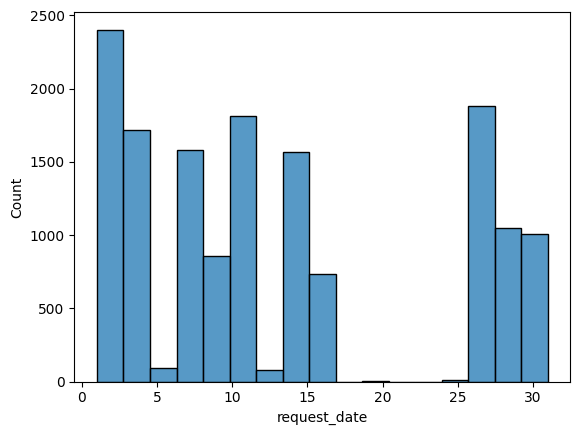

In [295]:
train.request_date.dt.day.value_counts()
sns.histplot(train.request_date.dt.day)